# SEGUNDA ENTREGA DEL PROYECTO FINAL 💻

- Curso: Data Science

- Comisión: 22740

- Profesor: Luca Cittá Giordano

- Tutor: Juan Felipe Gonzalez Sanmiguel

- Fecha: 24/2/22

## Equipo de trabajo

- Germán Hilgert
- Iván González Seguezzo
- José Nardulli


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Ames_Housing_filtrado.csv", index_col="PID")
df.sample(6)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
916386060,60,RL,73.000000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,174000
907203070,20,RL,68.000000,7480,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,127000
916125360,20,RL,69.035435,57200,Pave,IR1,Bnk,AllPub,Inside,Sev,...,50,0,0,0,0,6,2010,WD,Normal,160000
531363010,20,RL,80.000000,9605,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2009,WD,Normal,159000
528114010,20,RL,120.000000,14780,Pave,IR1,HLS,AllPub,Corner,Mod,...,0,0,156,0,0,6,2006,WD,Normal,415000
534451080,20,RL,69.035435,6627,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,72500


In [3]:
#Cambio de tipo de dato
df = df.astype({'MS SubClass':object})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 526301100 to 924151050
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2916 non-null   object 
 1   MS Zoning        2916 non-null   object 
 2   Lot Frontage     2916 non-null   float64
 3   Lot Area         2916 non-null   int64  
 4   Street           2916 non-null   object 
 5   Lot Shape        2916 non-null   object 
 6   Land Contour     2916 non-null   object 
 7   Utilities        2916 non-null   object 
 8   Lot Config       2916 non-null   object 
 9   Land Slope       2916 non-null   object 
 10  Neighborhood     2916 non-null   object 
 11  Condition 1      2916 non-null   object 
 12  Condition 2      2916 non-null   object 
 13  Bldg Type        2916 non-null   object 
 14  House Style      2916 non-null   object 
 15  Overall Qual     2916 non-null   int64  
 16  Overall Cond     2916 non-null   int64  
 17  Y

In [4]:
#Se observan las principales correlaciones de SalePrice con el resto de las variables
abs(df.corr())['SalePrice'].sort_values(ascending=False).head(15)

SalePrice         1.000000
Overall Qual      0.807339
Gr Liv Area       0.717221
Total Bsmt SF     0.658275
Garage Cars       0.657302
Garage Area       0.651576
1st Flr SF        0.642880
Year Built        0.567584
Full Bath         0.541953
Year Remod/Add    0.541144
Mas Vnr Area      0.508458
TotRms AbvGrd     0.494482
Fireplaces        0.475447
BsmtFin SF 1      0.442603
Lot Frontage      0.347040
Name: SalePrice, dtype: float64

In [5]:
#Obtención de distintos DataFrames
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_dummy = pd.get_dummies(df)
df_dummy

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
PID,,,,,,,,,,,,,,,,,,,,,
526301100,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,1,0,0,0,0,1,0
526350040,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
526351010,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
526353030,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,1,0,0,0,0,1,0
527105010,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,1,0,0,0,0,1,0
923276100,69.035435,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,1,0,0,0,0,1,0
923400125,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
from sklearn.preprocessing import MinMaxScaler

#Se realizado un escalado para la normalización de los datos
scaler = MinMaxScaler()
df_dummy_sca = scaler.fit_transform(df_dummy)
df_dummy_sca = pd.DataFrame(df_dummy_sca)
df_dummy_sca.columns = df_dummy.columns
df_dummy_sca

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0.410959,0.142420,0.555556,0.500,0.637681,0.166667,0.07000,0.279283,0.000000,0.188784,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.202055,0.048246,0.444444,0.625,0.644928,0.183333,0.00000,0.204545,0.094364,0.115582,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.205479,0.060609,0.555556,0.625,0.623188,0.133333,0.06750,0.403409,0.000000,0.173801,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.246575,0.046087,0.666667,0.500,0.695652,0.300000,0.00000,0.465472,0.000000,0.447346,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.181507,0.058566,0.444444,0.500,0.905797,0.800000,0.00000,0.345717,0.000000,0.058647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,0.054795,0.031022,0.555556,0.625,0.811594,0.566667,0.00000,0.357955,0.000000,0.078767,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2912,0.164505,0.035453,0.444444,0.500,0.804348,0.550000,0.00000,0.131556,0.212320,0.102312,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2913,0.140411,0.042726,0.444444,0.500,0.869565,0.700000,0.00000,0.147290,0.000000,0.246147,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2914,0.191781,0.040711,0.444444,0.500,0.739130,0.416667,0.00000,0.468094,0.080603,0.083476,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
from sklearn.preprocessing import MinMaxScaler

#Se realizado un escalado para la normalización de los datos
scaler = MinMaxScaler()
df_num_sca = scaler.fit_transform(df_dummy)
df_num_sca = pd.DataFrame(df_dummy_sca)
df_num_sca.columns = df_dummy.columns
df_num_sca

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0.410959,0.142420,0.555556,0.500,0.637681,0.166667,0.07000,0.279283,0.000000,0.188784,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.202055,0.048246,0.444444,0.625,0.644928,0.183333,0.00000,0.204545,0.094364,0.115582,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.205479,0.060609,0.555556,0.625,0.623188,0.133333,0.06750,0.403409,0.000000,0.173801,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.246575,0.046087,0.666667,0.500,0.695652,0.300000,0.00000,0.465472,0.000000,0.447346,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.181507,0.058566,0.444444,0.500,0.905797,0.800000,0.00000,0.345717,0.000000,0.058647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,0.054795,0.031022,0.555556,0.625,0.811594,0.566667,0.00000,0.357955,0.000000,0.078767,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2912,0.164505,0.035453,0.444444,0.500,0.804348,0.550000,0.00000,0.131556,0.212320,0.102312,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2913,0.140411,0.042726,0.444444,0.500,0.869565,0.700000,0.00000,0.147290,0.000000,0.246147,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2914,0.191781,0.040711,0.444444,0.500,0.739130,0.416667,0.00000,0.468094,0.080603,0.083476,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Regresión lineal simple:
_Variable predictora: Área habitable_

_Variable a predecir: Precio de venta_

In [8]:
X=df_dummy_sca[['Gr Liv Area']]
y=df_dummy[['SalePrice']]

In [9]:
X

,Gr Liv Area
0,0.379231
1,0.161216
2,0.285427
3,0.509466
4,0.371486
...,...
2911,0.191910
2912,0.162937
2913,0.182444
2914,0.302639


In [10]:
y

,SalePrice
PID,
526301100,215000
526350040,105000
526351010,172000
526353030,244000
527105010,189900
...,...
923275080,142500
923276100,131000
923400125,132000


In [11]:
#split dataset to train and test(using sickit learn)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=50)

#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression

linear_regression_model= LinearRegression()
linear_regression_model.fit(X_train,y_train)

#Predicción de resultados
y_pred=linear_regression_model.predict(X_test)

In [12]:
#Recuperamos la intersección
print(linear_regression_model.intercept_)

[51408.72805173]


In [13]:
linear_regression_model.coef_

array([[386860.23790614]])

In [14]:
#Evaluación del Modelo
from sklearn import metrics
mae_rl = metrics.mean_absolute_error(y_test, y_pred).round(0)
mse_rl = metrics.mean_squared_error(y_test, y_pred).round(0)
rsme_rl = np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(0)
r2_score_rl = 0
print('Mean Absolute Error:', mae_rl)
print('Mean Squared Error:', mse_rl)
print('Root Mean Squared Error:', rsme_rl)

Mean Absolute Error: 38167.0
Mean Squared Error: 3052735783.0
Root Mean Squared Error: 55252.0


In [15]:
#compare the metrics to the mean of terget variable
df_dummy['SalePrice'].mean()

180270.938957476

In [16]:
#Residual. Diferencia entre y_test e y_pred.
test_residual = y_test - y_pred
test_residual.head()

,SalePrice
PID,
906203140,-12387.616912
902136110,-39196.375062
527166040,3478.096655
902134060,-70145.092911
534428060,18799.960688


C:\Users\VAIO\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

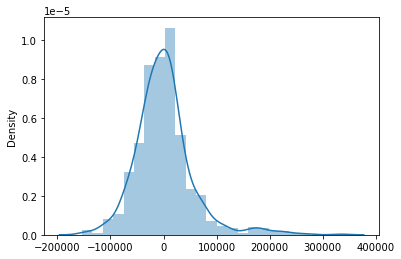

In [17]:
sns.distplot(test_residual, bins=25,kde=True)

# Regresión lineal múltiple:
_Variables predictoras: Se utilizan todos los Features numéricos_

_Variable a predecir: Precio de venta_

In [18]:
X=df_num.drop(['SalePrice'], axis=1)
y=df_num['SalePrice']
y

PID
526301100    215000
526350040    105000
526351010    172000
526353030    244000
527105010    189900
              ...  
923275080    142500
923276100    131000
923400125    132000
924100070    170000
924151050    188000
Name: SalePrice, Length: 2916, dtype: int64

In [19]:
#Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_test

PID
527359180    197500
535402220    159000
528435040    311872
907181100    192000
527402200    149000
              ...  
903458020    101000
907425010    149300
903225140    124000
535305120    155000
528186110    310090
Name: SalePrice, Length: 584, dtype: int64

In [20]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train);

#Predicción de resultados
y_pred = regressor.predict(X_test)

In [21]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Lot Frontage,151.688597
Lot Area,0.552462
Overall Qual,15484.223549
Overall Cond,4379.511125
Year Built,336.087589
Year Remod/Add,221.432446
Mas Vnr Area,30.274586
BsmtFin SF 1,20.712116
BsmtFin SF 2,2.617146
Bsmt Unf SF,-1.231658


Text(0, 0.5, 'y_pred')

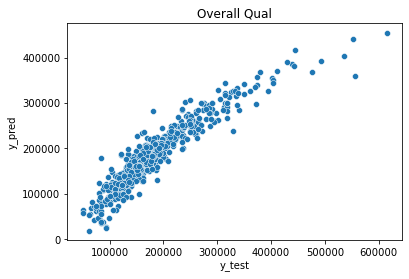

In [22]:
sns.scatterplot(x=y_test,y=y_pred) #i think it has pattern
plt.title('Overall Qual') #title
plt.xlabel('y_test') #x label
plt.ylabel('y_pred') #y label

In [23]:
#Evaluación del Modelo
from sklearn import metrics
mae_rlm = metrics.mean_absolute_error(y_test, y_pred).round(0)
mse_rlm = metrics.mean_squared_error(y_test, y_pred).round(0)
rsme_rlm = np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(0)
r2_score_rlm = 0
print('Mean Absolute Error:', mae_rlm)
print('Mean Squared Error:', mse_rlm)
print('Root Mean Squared Error:', rsme_rlm)

Mean Absolute Error: 19321.0
Mean Squared Error: 765216326.0
Root Mean Squared Error: 27663.0


# Decision Tree Regression
_Variables predictoras: Se utilizan todos los Features, con datos normalizados_

_Variable a predecir: Precio de venta_

In [24]:
#X=df_final.drop('SalePrice', axis=1)
#y=df_final['SalePrice']

#Pruebo con output Overall Qual y el resultado es un poco más aceptable.
X = df_dummy_sca.drop('SalePrice', axis=1)
y = df_dummy['SalePrice']
y

PID
526301100    215000
526350040    105000
526351010    172000
526353030    244000
527105010    189900
              ...  
923275080    142500
923276100    131000
923400125    132000
924100070    170000
924151050    188000
Name: SalePrice, Length: 2916, dtype: int64

In [25]:
#Importamos la libreria para automatizar la separación entre train y test. 
from sklearn.model_selection import train_test_split 

#Me quedo con 30% para test y 70% para train. Semilla número 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [26]:
#Importamos el modelo arbol de decisión de regresión
from sklearn.tree import DecisionTreeRegressor

#Creamos el modelo y lo llamamos regr
regr = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state = 42)

#Entrenamiento del modelo
regr.fit(X_train, y_train)

#Predicción de resultados
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

C:\Users\VAIO\miniconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [27]:
importances = regr.feature_importances_
nom_col_X = X.columns
importancias = pd.DataFrame(importances, index=nom_col_X, columns=["Importancia"])
importancias = importancias.sort_values(by="Importancia", ascending=False).head(7).T
importancias

,Overall Qual,Gr Liv Area,Total Bsmt SF,Garage Cars,1st Flr SF,BsmtFin SF 1,Garage Area
Importancia,0.792264,0.101342,0.031253,0.016339,0.010929,0.010017,0.007158


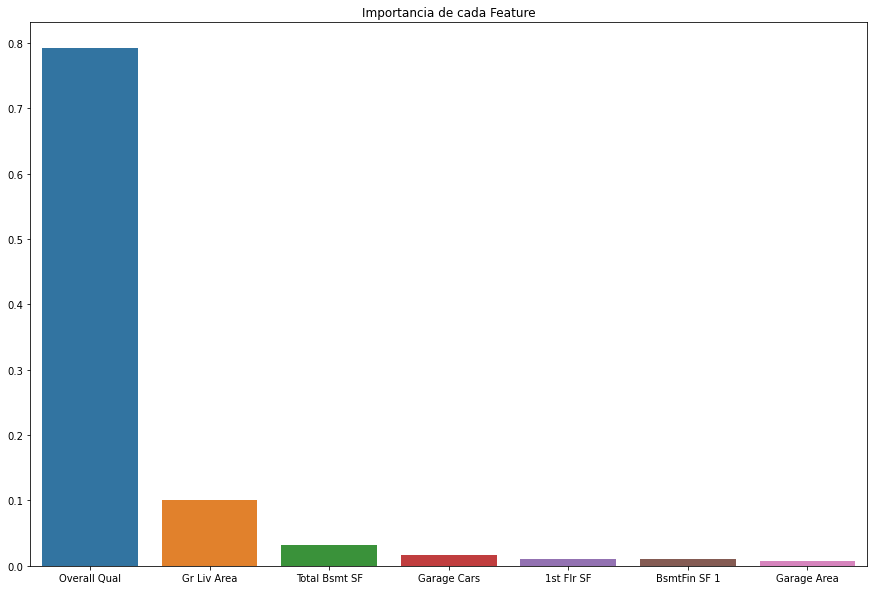

In [28]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(data=importancias)
plt.title('Importancia de cada Feature')
plt.show()
#Este warning es invisible xD

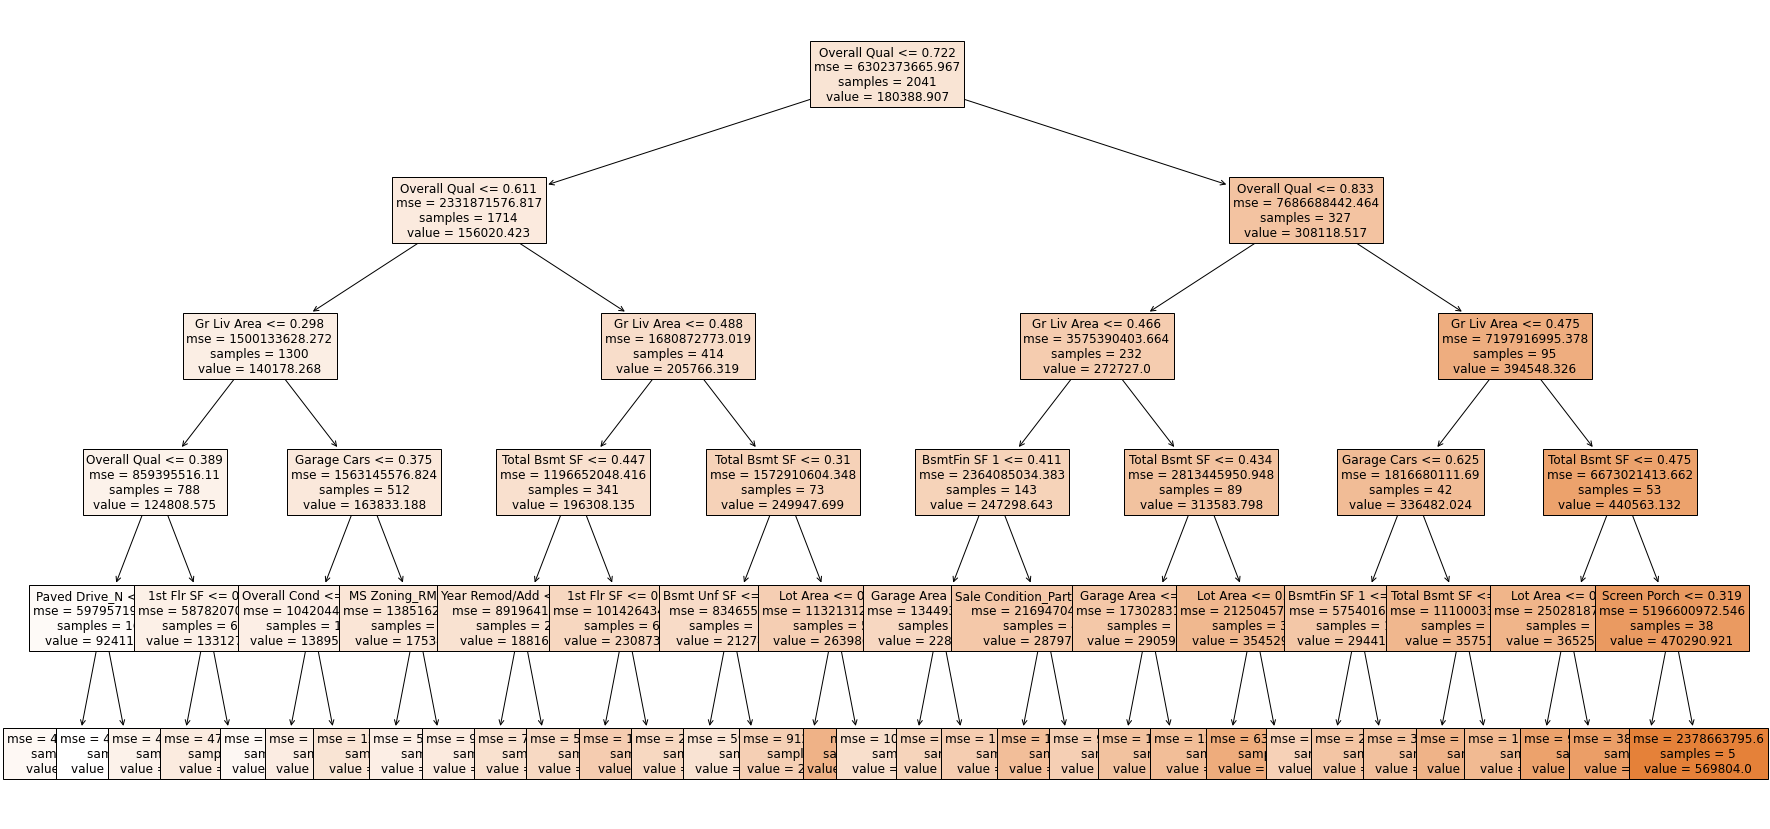

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(decision_tree = regr, feature_names=X.columns, filled = True, fontsize=12);

In [30]:
#Evaluación de Modelos
from sklearn import metrics
mae_dt = metrics.mean_absolute_error(y_test, y_test_pred).round(0)
mse_dt = metrics.mean_squared_error(y_test, y_test_pred).round(0)
rsme_dt = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)).round(0)
r2_score_dt = 0
print('Mean Absolute Error:', mae_dt)
print('Mean Squared Error:', mse_dt)
print('Root Mean Squared Error:', rsme_dt)

Mean Absolute Error: 25136.0
Mean Squared Error: 1201921164.0
Root Mean Squared Error: 34669.0


# Support Vector Regression
_Variables predictoras: Se utilizan todos los Features, con datos normalizados_

_Variable a predecir: Precio de venta_

Algunas definiciones para SVR:
 - Épsilon es el margen de error aceptable.
 - C es el tolerancia para los puntos por fuera de Épsilon.
 - Se determinó un Épsilon igual a 5000 porque debido a los valores que tienen los inmuebles, 5000 dólares no significaría una gran variación patrimonial para una compraventa de las propiedades para las personas interesadas en ellas.


In [31]:
from sklearn.svm import SVR

#Se siguen utilizando los mismos "X" e "y" configurados en el último Algoritmo, y su misma división en train y test

#Se configura el valor de Epsilon 
svm_reg = SVR(kernel='rbf', C=1000,epsilon=5000)

#Entrenamiento del modelo
svm_reg.fit(X_train, y_train)

#Predición
bpred = svm_reg.predict(X_test)

In [32]:
#Evaluación de Modelo
from sklearn import metrics
mae_svr = metrics.mean_absolute_error(y_test, bpred).round(0)
mse_svr = metrics.mean_squared_error(y_test, bpred).round(0)
rsme_svr = np.sqrt(metrics.mean_squared_error(y_test, bpred)).round(0)
r2_score_svr = 0
print('Mean Absolute Error:', mae_svr)
print('Mean Squared Error:', mse_svr)
print('Root Mean Squared Error:', rsme_svr)

Mean Absolute Error: 31260.0
Mean Squared Error: 2674040438.0
Root Mean Squared Error: 51711.0


# Random Forest
_Variables predictoras: Se utilizan todos los Features, con datos normalizados_

_Variable a predecir: Precio de venta_

In [33]:
from sklearn.ensemble import RandomForestRegressor

#Se siguen utilizando los mismos "X" e "y" configurados en el último Algoritmo, y su misma división en train y test

#Creamos un random forest
regr_rf = RandomForestRegressor(random_state=11, n_estimators=200, max_features="log2")

#Entrenamiento del modelo
regr_rf.fit(X_train, y_train)

#Predicción de resultados
y_pred=regr_rf.predict(X_test)

In [34]:
importances_rf = regr_rf.feature_importances_
nom_col_X = X.columns
importancias_rf = pd.DataFrame(importances_rf, index=nom_col_X, columns=["Importancia"])
importancias_rf = importancias_rf.sort_values(by="Importancia", ascending=False).head(10).T
importancias_rf

,Overall Qual,Year Built,Gr Liv Area,Garage Cars,Garage Area,1st Flr SF,Total Bsmt SF,Bsmt Qual_Ex,Exter Qual_TA,Kitchen Qual_Ex
Importancia,0.051639,0.039855,0.039536,0.037329,0.036772,0.035446,0.034249,0.032515,0.02889,0.025081


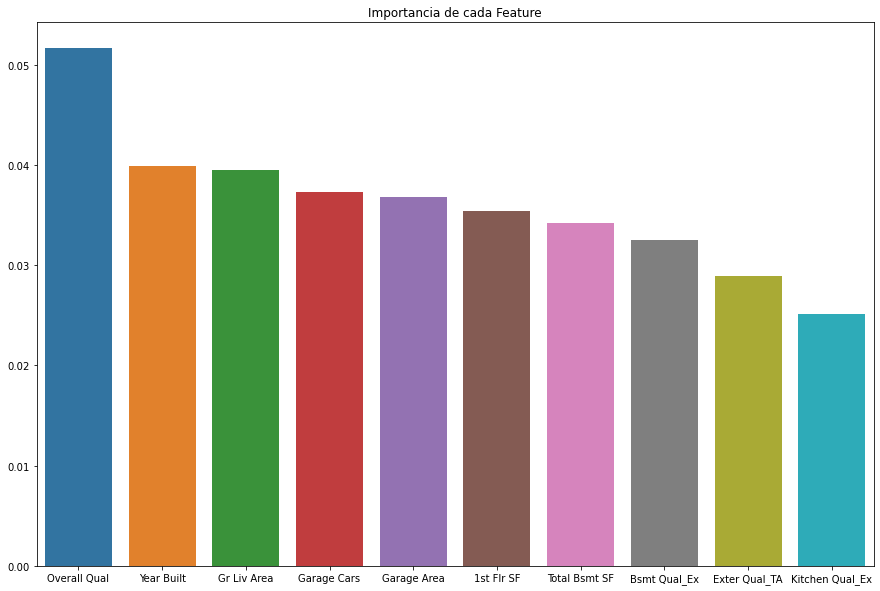

In [35]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(data=importancias_rf)
plt.title('Importancia de cada Feature')
plt.show()

In [36]:
df_res_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_res_rf

,Actual,Predicted
PID,,
903233140,132000,192659.658436
527451400,89500,124382.268692
527451450,89000,124382.268692
908127100,118500,124382.268692
527325110,190000,155090.909091
...,...,...
905105200,137900,124382.268692
528114010,415000,370975.857143
909252020,155000,192659.658436


In [37]:
#Evaluación de Modelos
from sklearn import metrics
mae_rf = metrics.mean_absolute_error(y_test, y_test_pred).round(0)
mse_rf = metrics.mean_squared_error(y_test, y_test_pred).round(0)
rsme_rf = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)).round(0)
r2_score_rf = 0
print('Mean Absolute Error:', mae_rf)
print('Mean Squared Error:', mse_rf)
print('Root Mean Squared Error:', rsme_rf)

Mean Absolute Error: 25136.0
Mean Squared Error: 1201921164.0
Root Mean Squared Error: 34669.0


## Evaluación de las métricas de los algoritmos Machine Learning

In [45]:
metrics = pd.DataFrame(index=['rmse', 'mae','mape'],
                       columns=['Regresion Lineal','Regresion Lineal Multiple','Decision Tree',
                                'Support Vector Regressor','Random Forest'])
metrics['Regresion Lineal'] = [mae_rl,mse_rl,rsme_rl]
metrics['Regresion Lineal Multiple'] = [mae_rlm,mse_rlm,rsme_rlm]
metrics['Decision Tree'] = [mae_dt,mse_dt,rsme_dt]
metrics['Support Vector Regressor'] = [mae_svr,mse_svr,rsme_svr]
metrics['Random Forest'] = [mae_rf,mse_rf,rsme_rf]
pd.set_option('display.float_format', lambda x: '%0.5f' % x)
metrics = metrics.T
metrics

,rmse,mae,mape
Regresion Lineal,38167.00000,3052735783.00000,55252.00000
Regresion Lineal Multiple,19321.00000,765216326.00000,27663.00000
Decision Tree,25136.00000,1201921164.00000,34669.00000
Support Vector Regressor,31260.00000,2674040438.00000,51711.00000
Random Forest,25136.00000,1201921164.00000,34669.00000


In [46]:
import plotly.express as px
fig = px.bar(metrics, x='rmse',color='rmse')
fig.show()

In [47]:
import plotly.express as px
fig = px.bar(metrics, x='mae',color='mae')
fig.show()

In [48]:
import plotly.express as px
fig = px.bar(metrics, x='mape',color='mape')
fig.show()

## Nota: 
        - Basando en los resultados, el algoritmo con el error absoluto más pequeño es la regresión lineal múltiple.
        - Observamos como el arbol de clasificación y el Random Forest cuentan con errores relativamente pequeños.
        - El error absoluto medio (MAE) nos indica que algoritmo tuvo una mayor cantidad de errores entre la muestra y la predicción actual fue el de regresión lineal simple.
        - La media de porcentaje absoluto de error (Mape) nos dará la indicación absoluta, de cual algoritmo fue el que tuvo el mayor grado de imprecisión a la hroa de hacer análisis predictivos en el modelo, y por tanto que algoritmo es el que debería evitar usarse.
        - Una vez asegurados que el mejor algoritmo para nuestro modelo sería el de regresión lineal múltiple se proseguirá con la aplicación de algoritmos de optimización dentro del modelo.